In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import pandas as pd

## Prepare data

In [2]:
plugins = pd.read_csv('data/plugin-category.csv', index_col='id').sort_index()
pedalboards = pd.read_csv('data/pedalboard-plugin-bag-of-words.csv', index_col=['index', 'id'])

# Alterar o nome da coluna de plugin 
plugins_copy = plugins.copy()
plugins_copy['Plugin'] = plugins_copy.name
plugins_copy['Category'] = plugins_copy.category

pedalboards.columns = [plugins_copy.Category, plugins_copy.Plugin]
pedalboards.head(2)

Category   Filter_EQ Modulation     SFX Modulation    Delay            \
Plugin      M-Filter    TheVibe Z-Organ     Slicer PhaseDly FilterDly   
index id                                                                
0     9467         0          0       0          0        0         0   
1     8913         0          0       0          0        0         0   

Category                      Modulation    SFX  ...   None Amp Modeling  \
Plugin     PitchDly StereoDly   BitCrush Bomber  ...   None    TONE CITY   
index id                                         ...                       
0     9467        0         0          0      0  ...      0            0   
1     8913        0         0          0      0  ...      2            0   

Category                                                                       
Plugin     B-BREAKER BGN DRIVE DELUXE-R ALIEN REVO-1 CAR DRIVE MS 1959 VX JMI  
index id                                                                       
0     9467         1         0        0     0      0         0       0      0  
1     8913         0         0        0     0      0         0       0      0  

[2 rows x 117 columns]

## Make the joint distribution

In [3]:
from probability.experiment import Experiment
from probability.new.joint_distribution import JointDistribution

somatorio_plugins = pedalboards.sum()
somatorio_plugins
del somatorio_plugins['None', 'None']

P = JointDistribution.from_series(somatorio_plugins)
P.series.head(10)

Category    Plugin   
Filter_EQ   M-Filter     0.002342
Modulation  TheVibe      0.003681
SFX         Z-Organ      0.001255
Modulation  Slicer       0.001924
Delay       PhaseDly     0.002928
            FilterDly    0.004768
            PitchDly     0.003263
            StereoDly    0.016313
Modulation  BitCrush     0.002928
SFX         Bomber       0.000000
Name: P(Category, Plugin), dtype: float64

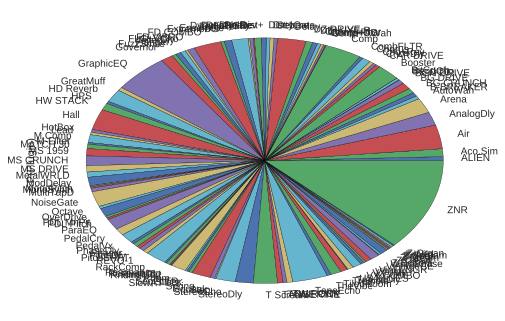

In [4]:
Category, Plugin = P.variables

P(Plugin).plot.pie()

<module 'matplotlib.pyplot' from '/home/paulo/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

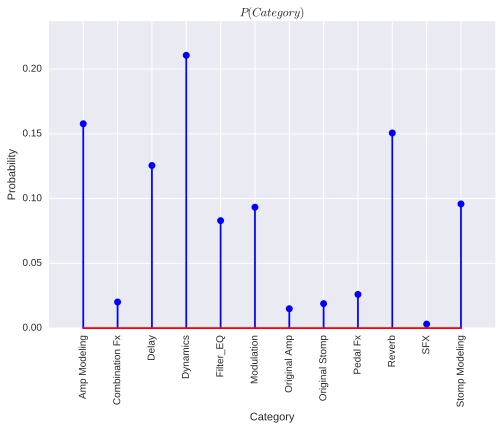

In [5]:
P(Category).plot()

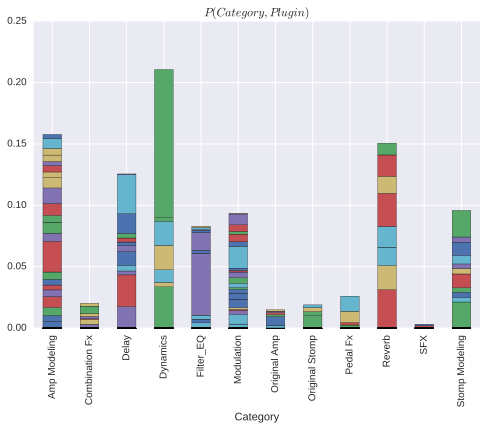

In [6]:
plot = P.plot.stacked_bar(legend=False)
plot.set_title('$P(Category, Plugin)$')

In [7]:
#plot = P.plot()
#plot.set_title('P(Category, Plugin)')

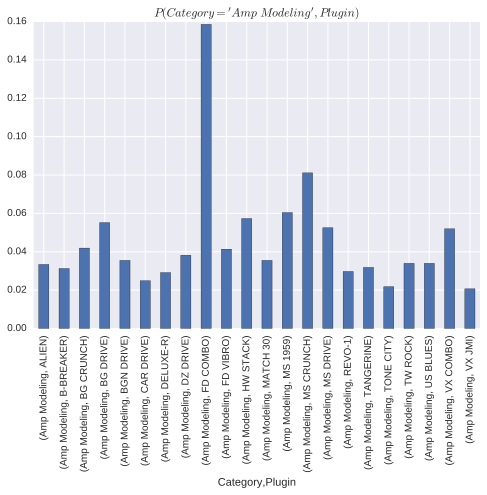

In [8]:
P_plugin = P(Category=='Amp Modeling', Plugin).normalize()
#P_plugin = P_plugin.marginalize_out(Category)

plot = P_plugin.plot.bar()
plot.set_title('$P(Category = \'Amp\ Modeling\', Plugin)$')

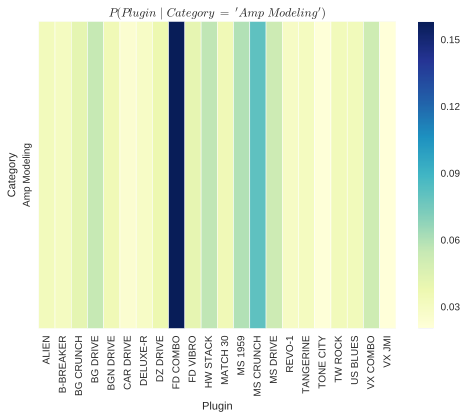

In [9]:
P(Plugin | (Category=='Amp Modeling')).plot()

In [10]:
P(Plugin | (Category=='Amp Modeling'))

Plugin     Category    
ALIEN      Amp Modeling     63/1886
B-BREAKER  Amp Modeling     59/1886
BG CRUNCH  Amp Modeling     79/1886
BG DRIVE   Amp Modeling      52/943
BGN DRIVE  Amp Modeling     67/1886
CAR DRIVE  Amp Modeling     47/1886
DELUXE-R   Amp Modeling     55/1886
DZ DRIVE   Amp Modeling      36/943
FD COMBO   Amp Modeling       13/82
FD VIBRO   Amp Modeling      39/943
HW STACK   Amp Modeling      54/943
MATCH 30   Amp Modeling     67/1886
MS 1959    Amp Modeling      57/943
MS CRUNCH  Amp Modeling    153/1886
MS DRIVE   Amp Modeling     99/1886
REVO-1     Amp Modeling      28/943
TANGERINE  Amp Modeling      30/943
TONE CITY  Amp Modeling        1/46
TW ROCK    Amp Modeling      32/943
US BLUES   Amp Modeling      32/943
VX COMBO   Amp Modeling      49/943
VX JMI     Amp Modeling     39/1886
Name: P(Plugin | Category = 'Amp Modeling'), dtype: object